In [2]:
import numpy as np
import os
import threading
import operator
import pickle
import re
import pandas as pd
from collections import Counter
from tqdm import tqdm_notebook as tqdm
from datetime import datetime
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from collections import Counter
from datetime import datetime
from tqdm import tqdm_notebook as tqdm
%config InlineBackend.figure_format = 'retina'
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import acf

start_time = 1190146243   
end_time = 1192994591

/home/xuanli2/penv/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
def dump_data(data, output_name):
    with open(output_name, 'wb') as f:
        pickle.dump(data, f)

def load_data(input_name):
    with open(input_name, 'rb') as f:
        data = pickle.load(f)
    return data

In [5]:
times = load_data('data/dump/access_per_second.pkl')

In [4]:
#timestamps = times.keys()
#key_list = list(times.keys())

In [5]:
len(times)

1885243

In [6]:
x = []
y = []
for time,count in times.items():
    x.append(time)
    y.append(count)

In [7]:
#start_time=datetime.strptime('2007-09-01 00:00:00', "%Y-%m-%d %H:%M:%S")
#type(start_time)

In [8]:
start_time = datetime.fromtimestamp(1190146243)


In [9]:
passed_second=[]
for time,count in times.items():
    time = datetime.fromtimestamp(time)
    pass_sec=(time-start_time).total_seconds()
    passed_second.append(pass_sec)


In [10]:
#count per hour
passed_hour=np.array(passed_second)//3600

count=list(Counter(passed_hour).items())
count=sorted(count, key=lambda x:x[0])
x,y=[],[]
for xx,yy in count:
    x.append(xx)
    y.append(yy)


In [11]:
#count per day 
passed_day=passed_hour//24

day_count = list(Counter(passed_day).items())
day_count = sorted(day_count, key=lambda x:x[0])
day,count =[],[]
for d,c in day_count:
    day.append(d)
    count.append(c)


In [12]:
day_count
type(day_count)

list

In [13]:
data = []
for i in range(350,400):
    data.append(y[i])

/home/xuanli2/penv/lib/python3.5/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


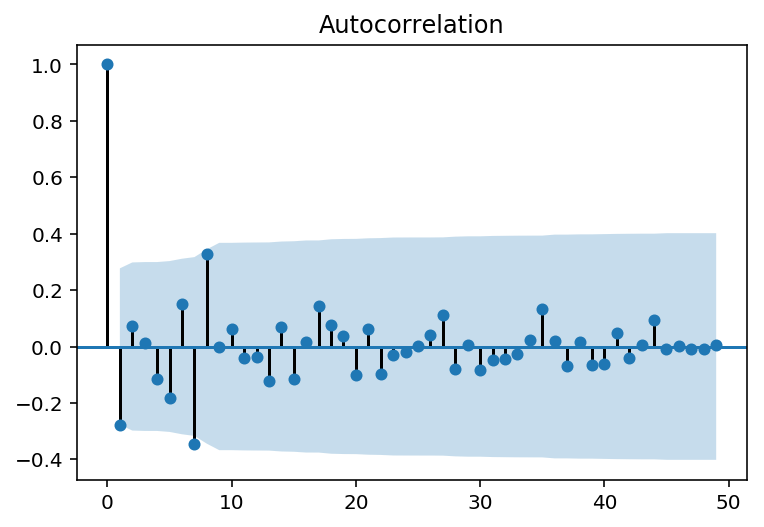

In [14]:
data = data - np.mean(data)
plot_acf(data,alpha=0.05, use_vlines=True).show()

In [218]:
from pandas import Series
from matplotlib import pyplot

In [219]:
series = Series(data)

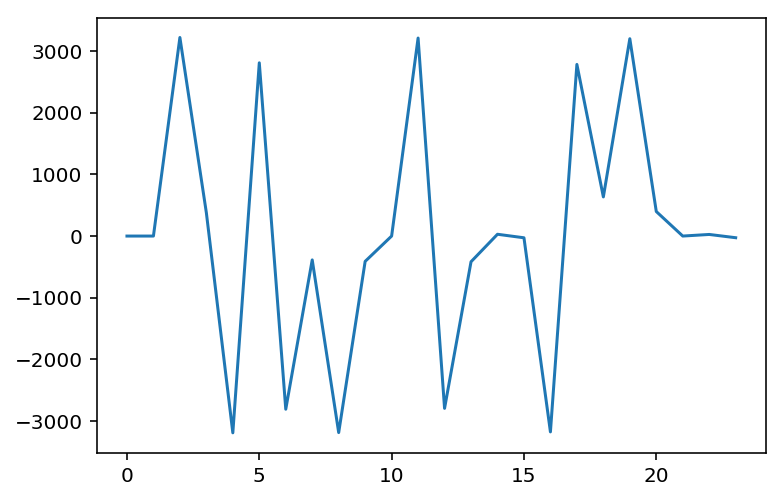

In [220]:
X = series.values
diff = list()
season = 24
for i in range(season, len(X)):
    value = X[i] - X[i - season]
    diff.append(value)
pyplot.plot(diff)
pyplot.show()

/home/xuanli2/penv/lib/python3.5/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


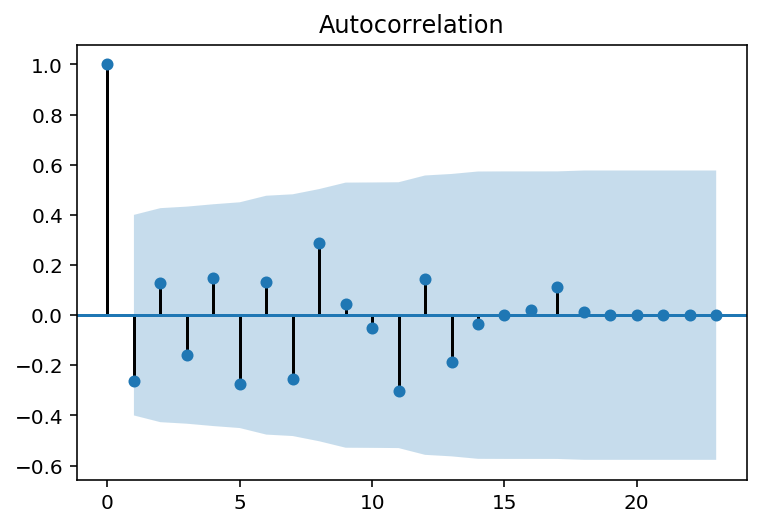

In [221]:
plot_acf(diff,alpha=0.05, use_vlines=True).show()

In [222]:
count

[]

In [14]:
weekend_passed_hour=list(filter(lambda x:x//24>=1 and x//24<=2,passed_hour))
weekend_passed_hour=np.array(weekend_passed_hour)
count=list(Counter(weekend_passed_hour).items())
count=sorted(count, key=lambda x:x[0])
x,y=[],[]
for xx,yy in count:
    x.append(xx)
    y.append(yy)


In [55]:
len(x)

TypeError: object of type 'numpy.float64' has no len()

In [15]:
weekday_passed_hour=list(filter(lambda x:x//24>=4 and x//24<=5,passed_hour))
weekday_passed_hour=np.array(weekday_passed_hour)
count=list(Counter(weekday_passed_hour).items())
count=sorted(count, key=lambda x:x[0])
a,b=[],[]
for p,q in count:
    a.append(p)
    b.append(q)


In [54]:
len(a)

40

In [16]:
import scipy

In [17]:
scipy.stats.ttest_ind(y,b)

Ttest_indResult(statistic=0.7759791187180155, pvalue=0.43999370382190195)

In [64]:
weekday=[]
weekend=[]
for i in range(0,33):
    x=day_count[i][0]
    ##print(x)
    y=day_count[i][1]
    ##print(y)
    if x%7==4 or x%7==5:
        weekend.append(y)
    else:
        weekday.append(y)

In [66]:
scipy.stats.ttest_ind(weekend,weekday)

Ttest_indResult(statistic=-0.29637208175195234, pvalue=0.7689224718280665)

In [68]:
passed_hour


array([288., 288., 288., ..., 287., 287., 287.])

In [16]:
print sm.tsa.stattools.adfuller(data)

SyntaxError: invalid syntax (<ipython-input-16-1a3f0f0e4514>, line 1)

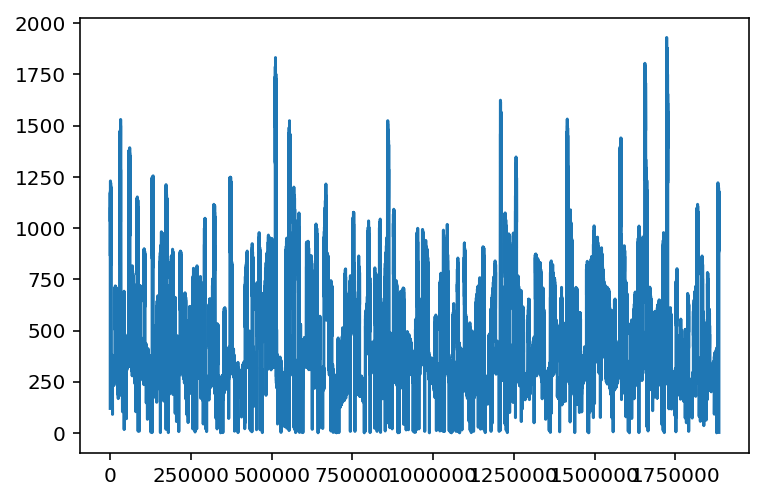

In [24]:
plt.plot(times.values())

https://stackoverflow.com/questions/29384696/how-to-find-current-day-is-weekday-or-weekends-in-python


0
1
2
3
4
5
6
7
8
9


In [6]:
from datetime import datetime

access_by_hour = {}

t = datetime.fromtimestamp(list(times.keys())[0])

for time in times:
    date = datetime.fromtimestamp(time)
    index = (date.month, date.day, date.hour)
    if index in access_by_hour:
        access_by_hour[index] += times[time]
    else:
        access_by_hour[index] = times[time]


In [7]:
#dump_data(access_by_hour,"data/dump/access_by_hour.pkl")

In [4]:
access_by_hour = load_data("data/dump/access_by_hour.pkl")

In [5]:
def update_sorted_by_access(dictionary):
    tuples = [(index, dictionary[index]) for index in dictionary.keys()] 
    return sorted(tuples, key = lambda x: x[0]) 


In [6]:
series

NameError: name 'series' is not defined

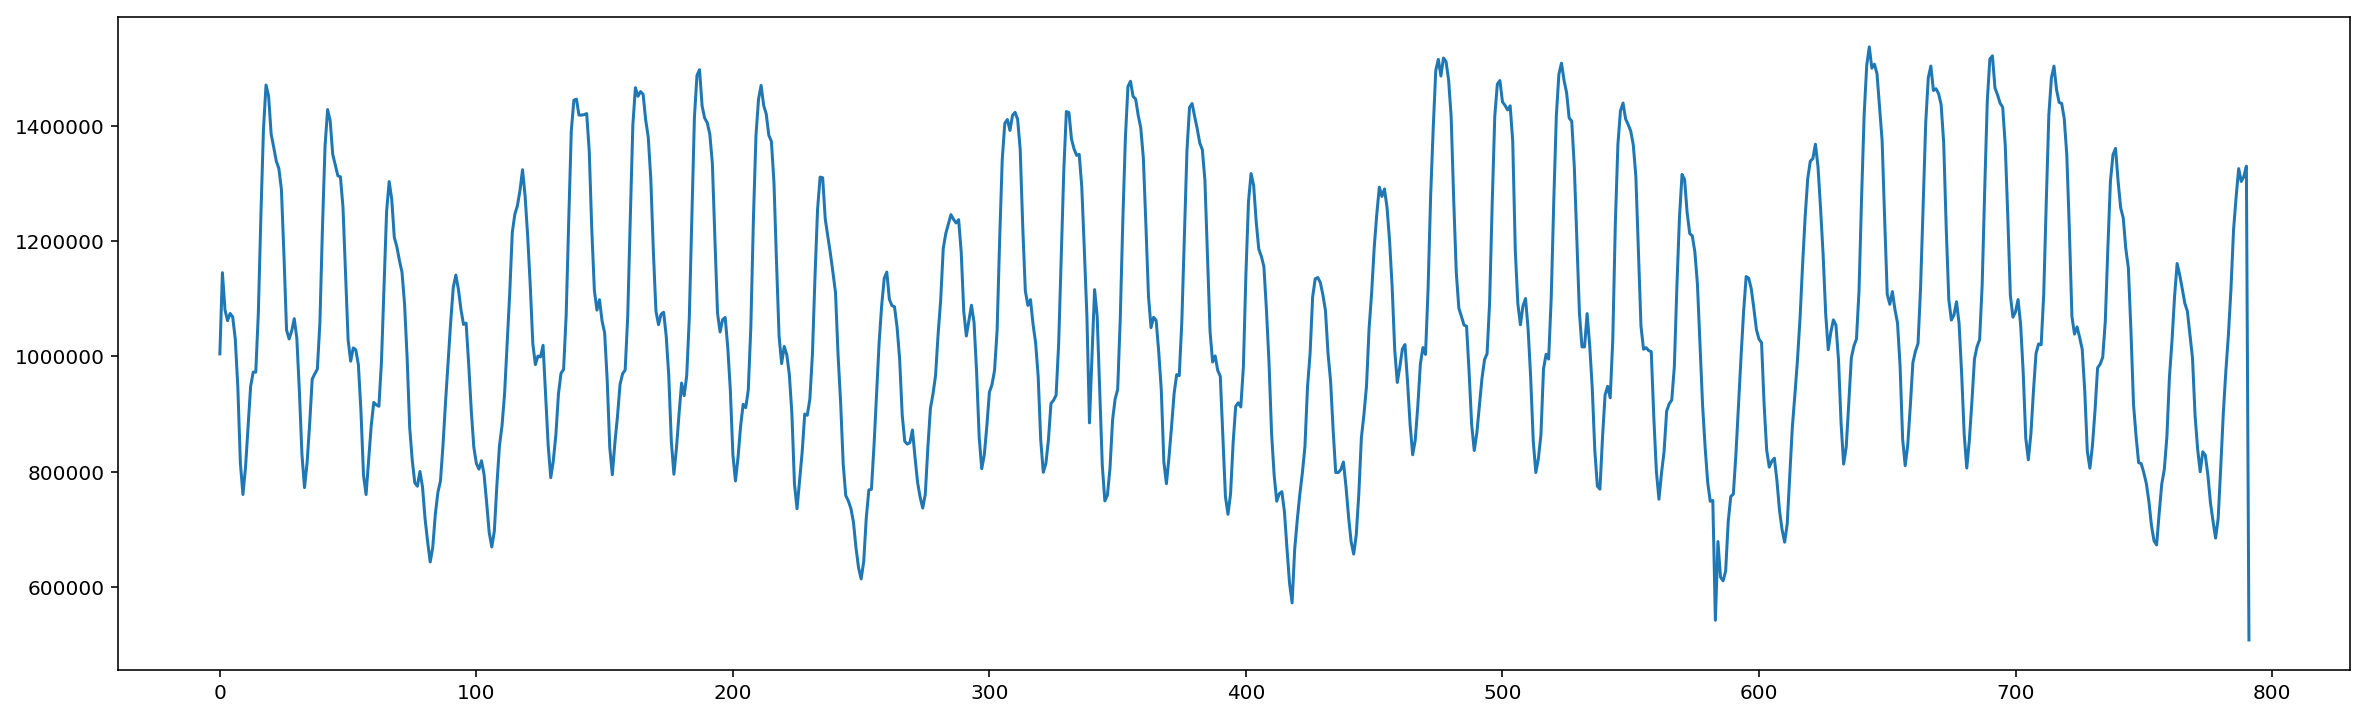

In [7]:
series = update_sorted_by_access(access_by_hour)
plt.figure(figsize=(20,6))
plt.plot(range(len(series)),[data[1] for data in series])

In [9]:
series

[(428.0, 1004267),
 (429.0, 1145141),
 (430.0, 1080524),
 (431.0, 1061967),
 (432.0, 1074380),
 (433.0, 1068372),
 (434.0, 1030628),
 (435.0, 947552),
 (436.0, 814671),
 (437.0, 760219),
 (438.0, 807169),
 (439.0, 878900),
 (440.0, 947881),
 (441.0, 972662),
 (442.0, 972491),
 (443.0, 1075108),
 (444.0, 1244225),
 (445.0, 1394162),
 (446.0, 1470865),
 (447.0, 1451747),
 (448.0, 1385386),
 (449.0, 1362825),
 (450.0, 1338755),
 (451.0, 1325973),
 (452.0, 1289725),
 (453.0, 1173752),
 (454.0, 1045798),
 (455.0, 1030192),
 (456.0, 1043819),
 (457.0, 1065379),
 (458.0, 1031858),
 (459.0, 939668),
 (460.0, 829869),
 (461.0, 772112),
 (462.0, 814854),
 (463.0, 881979),
 (464.0, 960472),
 (465.0, 969554),
 (466.0, 977729),
 (467.0, 1057985),
 (468.0, 1223592),
 (469.0, 1364020),
 (470.0, 1428245),
 (471.0, 1409163),
 (472.0, 1350738),
 (473.0, 1332220),
 (474.0, 1313362),
 (475.0, 1311569),
 (476.0, 1258582),
 (477.0, 1145703),
 (478.0, 1028184),
 (479.0, 991527),
 (480.0, 1014582),
 (481.0, 1

In [8]:
bucket = {index:[] for index in set([(month, day) for ((month, day, _),_) in series])}

TypeError: 'float' object is not iterable

In [38]:
for key in access_by_hour:
    index = (key[0], key[1])
    hour = key[2]
    bucket[index].append((hour, access_by_hour[key]))

In [47]:
for key in bucket:
    bucket[key] = sorted(bucket[key], key=lambda x: x[1], reverse=True)

In [48]:
bucket

{(9, 18): [(20, 4017068), (23, 2123934), (22, 1963695), (21, 1770764)],
 (9, 19): [(19, 3259356),
  (1, 2625252),
  (14, 2413524),
  (8, 2347752),
  (21, 2125314),
  (23, 1872404),
  (20, 1778395),
  (22, 1245139),
  (12, 1244225),
  (16, 1129132),
  (11, 1075108),
  (10, 797030),
  (3, 770596),
  (5, 621491),
  (2, 563208),
  (15, 530856),
  (9, 530433),
  (0, 382750),
  (17, 249683),
  (13, 243222),
  (4, 154357),
  (6, 139040)],
 (9, 20): [(16, 2445198),
  (18, 2374000),
  (20, 2274607),
  (8, 1747915),
  (17, 1582694),
  (19, 1560845),
  (3, 1523048),
  (21, 1376842),
  (13, 1364020),
  (12, 1223592),
  (15, 1143488),
  (11, 1057985),
  (4, 991204),
  (7, 881979),
  (1, 869157),
  (6, 814854),
  (10, 798362),
  (5, 772112),
  (0, 382146),
  (9, 362812),
  (14, 265676),
  (22, 202755),
  (2, 198377)],
 (9, 21): [(17, 2144489),
  (13, 2035330),
  (19, 1839488),
  (0, 1643954),
  (23, 1639224),
  (3, 1451796),
  (22, 1389618),
  (16, 964951),
  (4, 953080),
  (8, 920035),
  (7, 879315

In [52]:
from datetime import datetime

access_by_day = {}

for time in times:
    date = datetime.fromtimestamp(time)
    index = (date.month, date.day)
    if index in access_by_day:
        access_by_day[index] += times[time]
    else:
        access_by_day[index] = times[time]

In [54]:
dump_data(access_by_day,"data/dump/access_by_day.pkl")

In [57]:
l = sorted([(key,access_by_day[key]) for key in access_by_day], key=lambda x: x[0])

<BarContainer object of 34 artists>

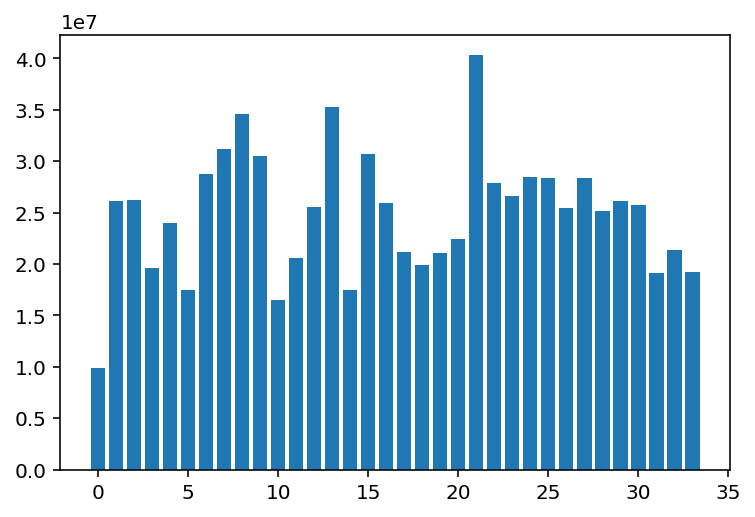

In [58]:
plt.bar(range(len(l)), [data[1] for data in l])

In [59]:
access_by_day

{(9, 18): 9875461,
 (9, 19): 26098267,
 (9, 20): 26213668,
 (9, 21): 19654392,
 (9, 22): 24027868,
 (9, 23): 17514447,
 (9, 24): 28778865,
 (9, 25): 31228939,
 (9, 26): 34583445,
 (9, 27): 30470619,
 (9, 28): 16536081,
 (9, 29): 20577674,
 (9, 30): 25571993,
 (10, 1): 35322686,
 (10, 2): 17435900,
 (10, 3): 30740225,
 (10, 4): 25938161,
 (10, 5): 21167517,
 (10, 6): 19930340,
 (10, 7): 21103473,
 (10, 8): 22463636,
 (10, 9): 40298127,
 (10, 10): 27849993,
 (10, 11): 26606468,
 (10, 12): 28484476,
 (10, 13): 28406459,
 (10, 14): 25457300,
 (10, 15): 28338534,
 (10, 16): 25118866,
 (10, 17): 26151349,
 (10, 18): 25782621,
 (10, 19): 19095000,
 (10, 20): 21380167,
 (10, 21): 19215431}